# Regression Analysis: Housing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf #for regression analysis

In [3]:
housing = pd.read_csv('C:\\Users\\DIGI TECH\\Downloads\\housing.csv', index_col = 0)
housing.head()
# LSTAT = 'Low Status' Population,
# INDUS = Proportin o non-retail business acres per town,
# NOX = Nitric Oxides Concetration,
# RM = Average Number of Rooms,
# MEDV = Median value of homes

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


## Covariance

In [3]:
#To check association 
housing.cov() 
#By values we can not tell which has strong cov/association

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


# Correlation

In [4]:
housing.corr()
#Diagonal elemets are one, itslef perfectly correlated

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


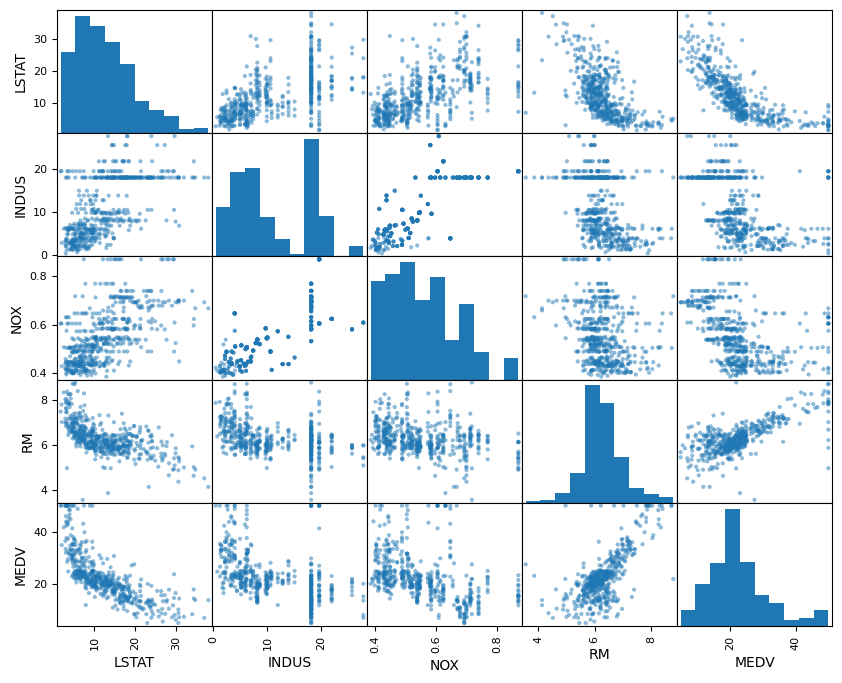

<Figure size 640x480 with 0 Axes>

In [4]:
scatter_matrix(housing, figsize = (10,8))
plt.show()
# The histogram are diagonal are those of variable, RM has strong linear pattern with MEDV, 
# LSTAT as non-linear pattern with MEDV
plt.savefig('SLR.png',bbox_inches = 'tight',pad_inches=1)

# Simple linear Regression

 $y_i = \beta_0 + \beta_1 * x_i + \epsilon_i$
   (ObserverError)

Association between LSTAT and MEDV to make simple linear regression model to estimate the value of B0 (intercept) and B1 (slop)

In [14]:
# Prediction equation is to guess the real value of intercept and slop 
# we use b0, b1 to get a straght line that describe our data and predict values of response 

b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1 * housing.LSTAT #regression equation

# To check the error of guess
# This shows how far is or guess response from true response
housing['ObservedError'] = housing.MEDV - housing.GuessResponse 

#To check observed error for 7's, 20's, and 100's pairs from the samples.
indices = [7 , 20, 100]
print(housing.ObservedError.loc[indices])
SSE  = (housing['ObservedError']**2).sum()
print('Sum of square Error is', SSE)

7       7.85
20     -7.52
100    17.98
Name: ObservedError, dtype: float64
Sum of square Error is 165796.21030000004


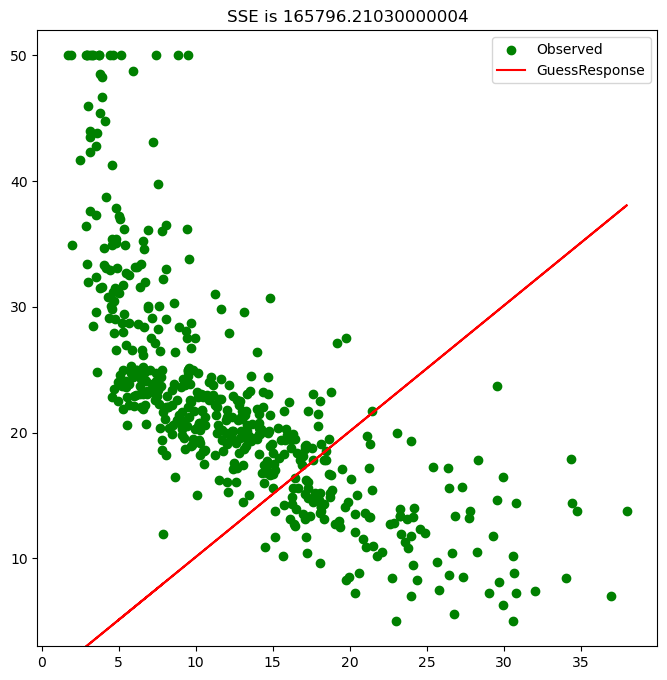

In [15]:
# Plot estimate line together with the points
plt.figure(figsize  = (8,8))
plt.title('SSE is {}'.format(SSE))

plt.scatter(housing.LSTAT, housing.MEDV, color='g', label='Observed')
plt.plot(housing.LSTAT, housing.GuessResponse, color = 'r', label = 'GuessResponse') #Regression line

plt.xlim(housing.LSTAT.min()-2, housing.LSTAT.max()+2)
plt.ylim(housing.MEDV.min()-2, housing.MEDV.max()+2)
plt.legend()
plt.show()

# OLS (Ordinary least  Square estimation)

In [16]:
# OLS to minimize SSE and check best fit line
model = smf.ols(formula = 'MEDV ~ LSTAT', data = housing).fit() #regression model

# for estimated slope and intercept we use ols
b0_ols = model.params[0] 
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols * housing.LSTAT
housing['Error'] = housing.MEDV - housing.BestResponse
# error after ols
SSE2  = (housing['Error']**2).sum()
print('Sum of square Error is', SSE2)

Sum of square Error is 19472.38141832644


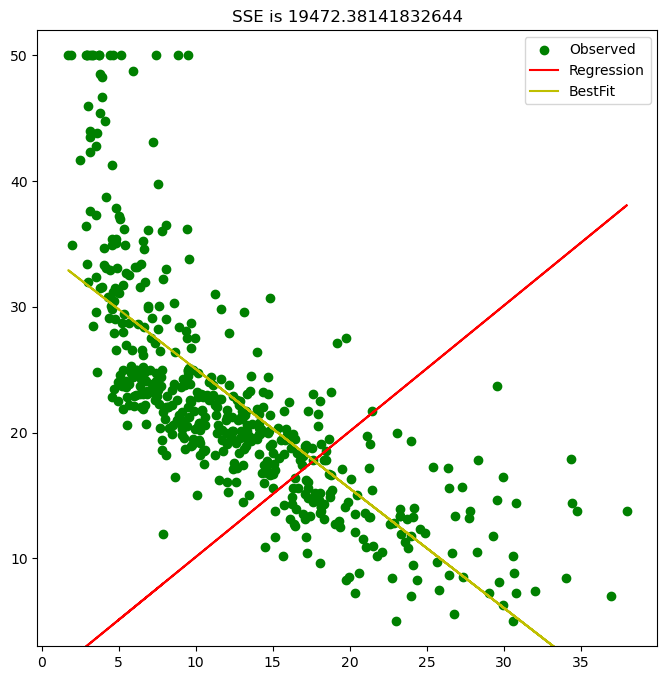

In [17]:
# Plot estimate line together with the points, Regression line and best fit line
plt.figure(figsize  = (8,8))
plt.title('SSE is {}'.format(SSE2))

plt.scatter(housing.LSTAT, housing.MEDV, color='g', label='Observed')
plt.plot(housing.LSTAT, housing.GuessResponse, color = 'r', label = 'Regression') #Regression line
plt.plot(housing.LSTAT, housing.BestResponse, color= 'y' , label = 'BestFit') #best fit SSE2 smaller

plt.xlim(housing.LSTAT.min()-2, housing.LSTAT.max()+2)
plt.ylim(housing.MEDV.min()-2, housing.MEDV.max()+2)
plt.legend()
plt.show()

# Diagonstic of Linear regression

Assumption behind linear regression model
1. Assosiation/linearity between LSTAT and MEDV (a closer look)
2. Independence
3. Normality
4. Equal Variance

# Linearity

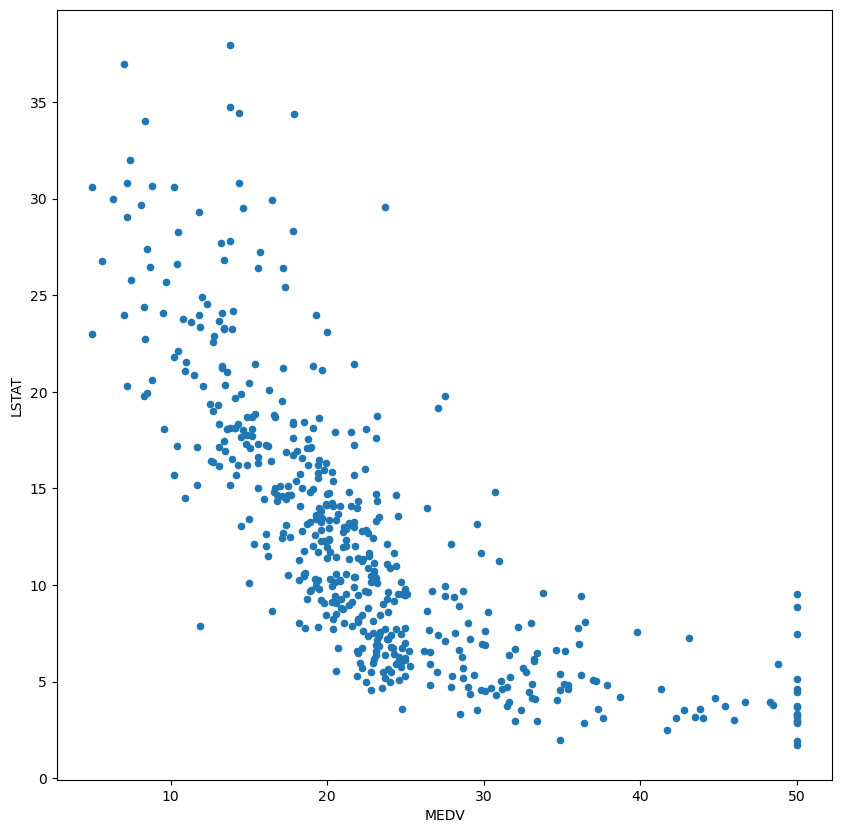

In [18]:
housing.plot(kind = 'scatter',x = 'MEDV', y = 'LSTAT', figsize = (10,10))
plt.show()
# scatter plot has it is non-linear pattern
#  assuumption violated

# Independence

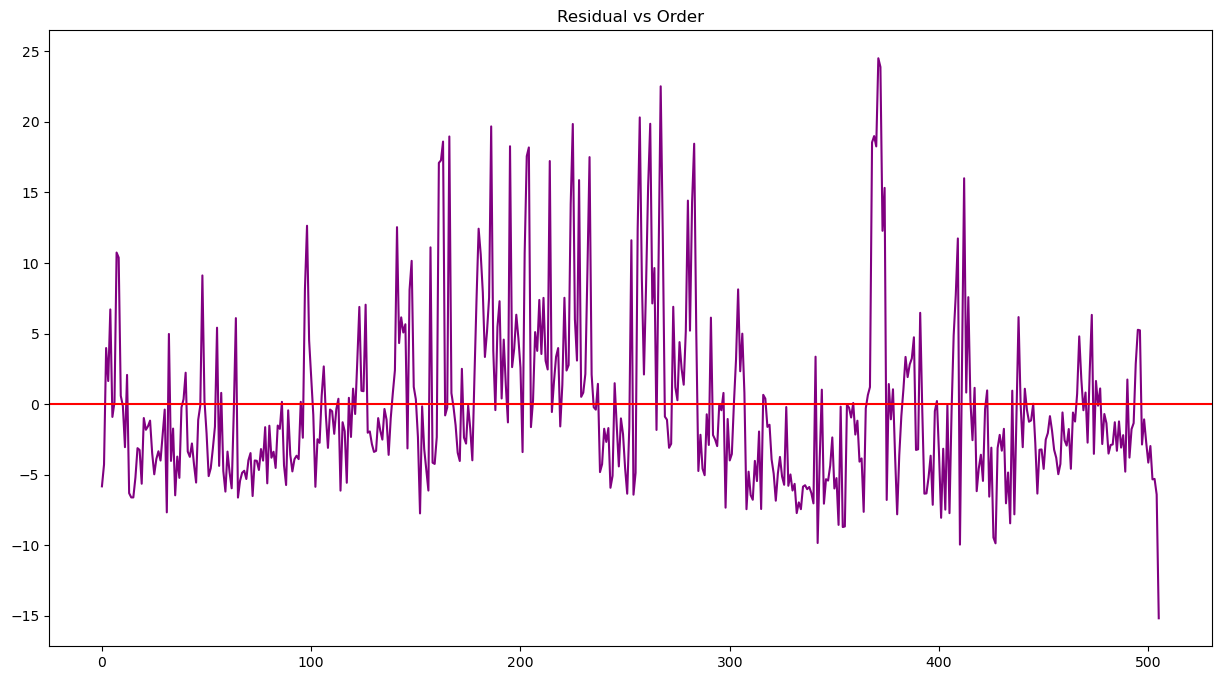

In [19]:
# Observed Error is independent, no correlation in errors
housing['Error'] = housing.MEDV - housing.BestResponse
# Method #1
# Error vs order fast check
plt.figure(figsize = (15,8))
plt.title('Residual vs Order')
plt.plot(housing.index, housing.Error, color = 'purple')
plt.axhline(y = 0, color = 'r')
plt.show()
# no obvios pattern in the plot

In [20]:
# Method #2
# refer to p-value of y(LSTAT), CI and R-square to evaluate conclusion
model.summary()
# rle off thumb thta test statistics value is in range -1.026 to -0.874 are normal
# below -1.026 eror positive corelated and above - 0.874 error negative corellated
# asssumption violated DW is 0.892

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           5.08e-88
Time:                        09:46:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P-value of slop
attention to p-value of slop(Lstat), vlaue ffor two tail test follows t-dist wit dof n-2->cause it loss 2 var freedom
if reject freedom y!=0, p < 0.05->reject
not reject means te cosen var y is good to predict the x, hypothesis
we hhave 5% cance to include var wrongly, alpha = 0.05 
### alpa CI of slop 
alpha is 95% means means 5% chance te model can be incorrect
95% is between -1.026 and -0.0874, range located on the negative side of real line and the slop is negative with 
high chance which is consistet with corelation of scatter plot of or data
######## R-square
importat measre of performanvce of model
compte variatoion of y without model which is sum of deviatiion-> sum(y-ybar)^2 =SST --> total variation
iff large diff btw prediction and  mean y is large, SSR of predict y -> sum(yhat-ybar)^2 --> variation explained
prediction is diff from mean response which is estimatedd value of response withot model
OLS,if variation of response can not be exploaninec by model ir predictorSSE --> variation unexpLained
SST = SSR + SSE, SSE relatively smaller
simple linear regression, R-square = 1 - SSE/SST
in model MEDV is 0.544, 54.4% off variation explained by or model
#### two facts for R high or low
if Rsquuare < 50%, variable not uniquely determine by model and there is big portion of it explinedd
explained by other varibales for which we need muultiple regreesion
if Rsquare are high enouugh for nosiy data like stock retuurn, Rsquare is already high to generate profit in trading

# Normality

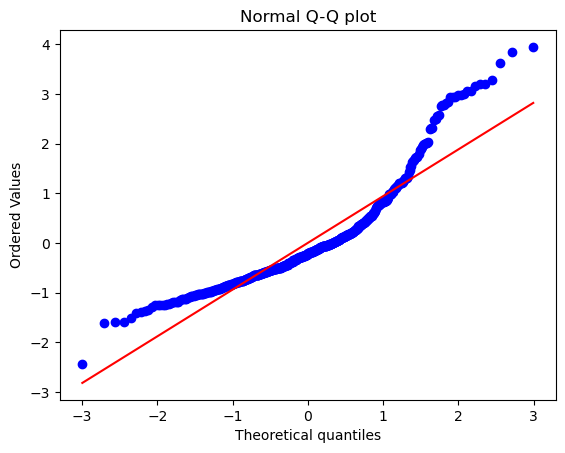

In [22]:
#  normal distribution
import scipy.stats as stats
z = (housing.Error - housing.Error.mean())/housing.Error.std(ddof=1) #standardize error
stats.probplot(z, dist = 'norm', plot = plt) #for QQ plot

plt.title('Normal Q-Q plot')
plt.show()
# to follow norm dist line fall 45degree roughly, here line is a bit on right tail but 
# overall satisfing normality assumption satisffiedd

# Equal Variance

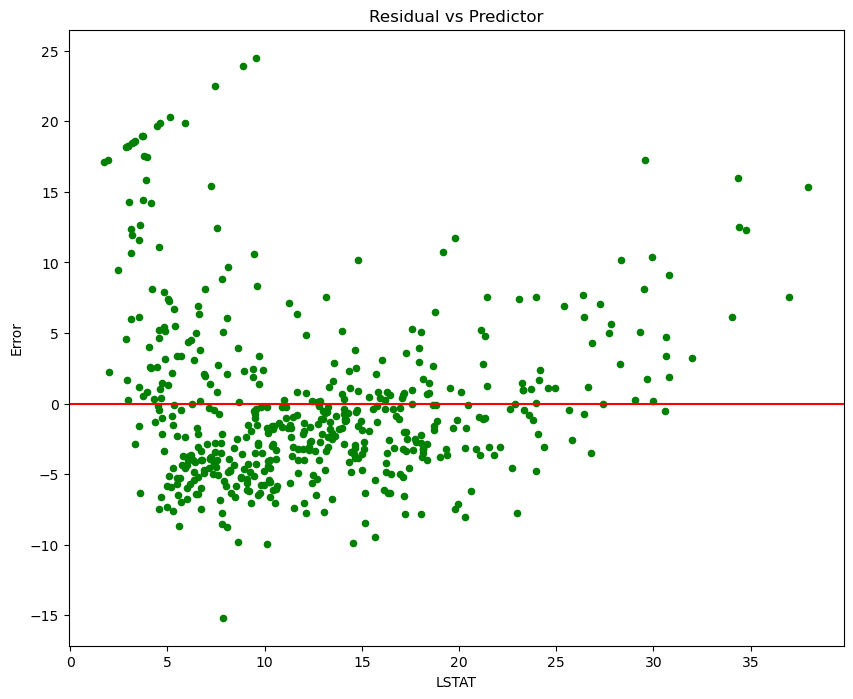

In [23]:
#  observed error/ residual vs predictor
housing.plot(kind = 'scatter', x = 'LSTAT', y = 'Error', color = 'g', figsize  = (10,8))
plt.title('Residual vs Predictor')
plt.axhline(y = 0, color = 'r')
plt.show()
# if variance of noise is diff for diff var predictor it not hv pattern.
# here noise var is smaller or big no of houses
# var is small for large lstat
# assumpotion violated

1. assumption violated model not found on inference 
2. accurancy and consistency not based on there asssumptions
3. model can not be predicted by this variable